In [1]:
#importing All Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import joblib
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
sns.set_style('whitegrid')

In [2]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

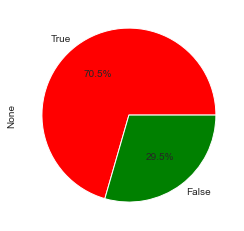

In [7]:
df.duplicated().value_counts().plot(kind='pie', autopct='%1.1f%%',colors=['red','green'])
plt.show()

In [8]:
df.duplicated().sum()

723

In [9]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [10]:
df.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [11]:
df.shape

(302, 14)

In [12]:
df.target.unique()

array([0, 1], dtype=int64)

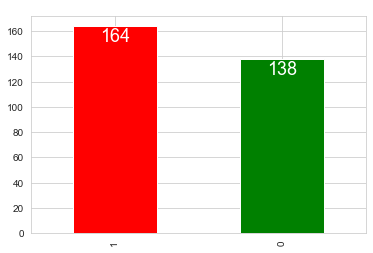

In [13]:
ax=df.target.value_counts().plot(kind='bar', color=['red','green'])
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.25, p.get_height()),ha='center',va='center',size=18,color='#ffffff')
plt.show()

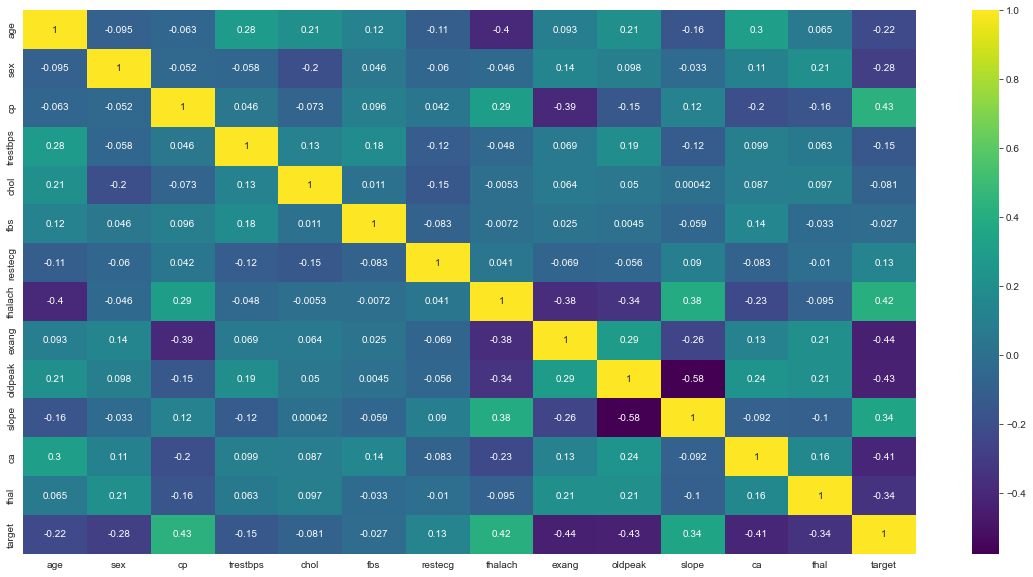

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.show()

In [15]:
X=df.drop(columns='target', axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [16]:
y=df.iloc[:,-1:]
y.head()

,target
0,0
1,0
2,0
3,0
4,0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("X_train having ",X_train.shape[0],' number od rows and ',X_train.shape[1],' number of columns.')
# display(X_train.head())
print("X_test having ",X_test.shape[0],' number od rows and ',X_test.shape[1],' number of columns.')
# display(X_test.head())
print("y_train having ",y_train.shape[0],' number od rows and ',y_train.shape[1],' number of columns.')
# display(y_train.head())
print("y_test having ",y_test.shape[0],' number od rows and ',y_test.shape[1],' number of columns.')
# display(y_test.head())

X_train having  241  number od rows and  13  number of columns.
X_test having  61  number od rows and  13  number of columns.
y_train having  241  number od rows and  1  number of columns.
y_test having  61  number od rows and  1  number of columns.


In [18]:
L_model=LogisticRegression()
L_model.fit(X_train, y_train)

LogisticRegression()

In [19]:
y_pred_train=L_model.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [20]:
y_pred_test=L_model.predict(X_test)
y_pred_test

array([1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [21]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8672199170124482
Test Accuarcy:  0.8032786885245902


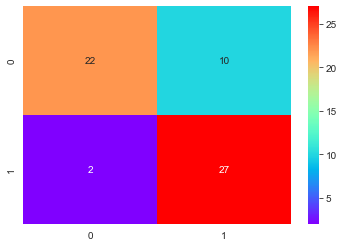

In [22]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [23]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.92      0.69      0.79        32
           1       0.73      0.93      0.82        29

    accuracy                           0.80        61
   macro avg       0.82      0.81      0.80        61
weighted avg       0.83      0.80      0.80        61



In [24]:
result=pd.DataFrame(data=[['Logistic Regresssion', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.86722,0.803279


In [25]:
s_model=SVC()
s_model.fit(X_train, y_train)

SVC()

In [26]:
y_pred_train=s_model.predict(X_train)
y_pred_train

array([1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1],
      dtype=int64)

In [27]:
y_pred_test=s_model.predict(X_test)
y_pred_test

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [28]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.6721991701244814
Test Accuarcy:  0.5901639344262295


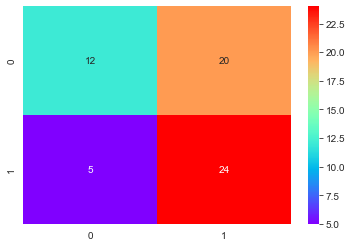

In [29]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [30]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.38      0.49        32
           1       0.55      0.83      0.66        29

    accuracy                           0.59        61
   macro avg       0.63      0.60      0.57        61
weighted avg       0.63      0.59      0.57        61



In [31]:
temp_df=pd.DataFrame(data=[['Support Vector Machine', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.867220,0.803279
1,Support Vector Machine,0.672199,0.590164


In [32]:
DT_model=DecisionTreeClassifier()
DT_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [33]:
y_pred_train=DT_model.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [34]:
y_pred_test=DT_model.predict(X_test)
y_pred_test

array([1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0], dtype=int64)

In [35]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  1.0
Test Accuarcy:  0.7213114754098361


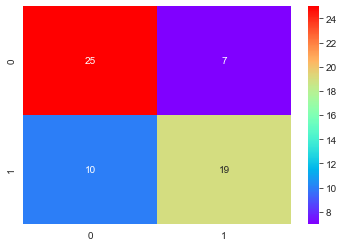

In [36]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [37]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.78      0.75        32
           1       0.73      0.66      0.69        29

    accuracy                           0.72        61
   macro avg       0.72      0.72      0.72        61
weighted avg       0.72      0.72      0.72        61



In [38]:
temp_df=pd.DataFrame(data=[['Decision Tree', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.867220,0.803279
1,Support Vector Machine,0.672199,0.590164
2,Decision Tree,1.000000,0.721311


In [39]:
RF_model=RandomForestClassifier(n_estimators=1000)
RF_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=1000)

In [40]:
y_pred_train=RF_model.predict(X_train)
y_pred_train

array([0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [41]:
y_pred_test=RF_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1], dtype=int64)

In [42]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  1.0
Test Accuarcy:  0.8524590163934426


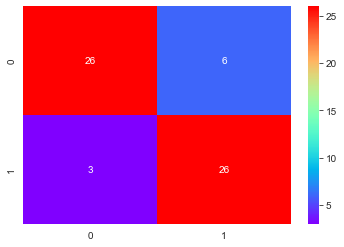

In [43]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [44]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.90      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.86      0.85      0.85        61



In [45]:
temp_df=pd.DataFrame(data=[['Random Forest', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.867220,0.803279
1,Support Vector Machine,0.672199,0.590164
2,Decision Tree,1.000000,0.721311
3,Random Forest,1.000000,0.852459


In [46]:
KNN_model=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=2)
KNN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [47]:
y_pred_train=KNN_model.predict(X_train)
y_pred_train

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [48]:
y_pred_test=KNN_model.predict(X_test)
y_pred_test

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [49]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.7634854771784232
Test Accuarcy:  0.639344262295082


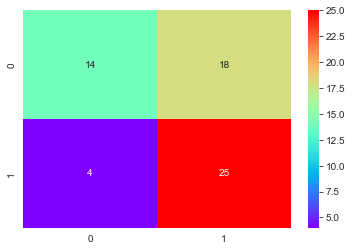

In [50]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [51]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.44      0.56        32
           1       0.58      0.86      0.69        29

    accuracy                           0.64        61
   macro avg       0.68      0.65      0.63        61
weighted avg       0.68      0.64      0.62        61



In [52]:
temp_df=pd.DataFrame(data=[['K-Nearest Neighbors', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.867220,0.803279
1,Support Vector Machine,0.672199,0.590164
2,Decision Tree,1.000000,0.721311
3,Random Forest,1.000000,0.852459
4,K-Nearest Neighbors,0.763485,0.639344


In [53]:
NB_model=GaussianNB()
NB_model.fit(X_train, y_train)

GaussianNB()

In [54]:
y_pred_train=NB_model.predict(X_train)
y_pred_train

array([1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1],
      dtype=int64)

In [55]:
y_pred_test=NB_model.predict(X_test)
y_pred_test

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [56]:
train_accuracy=accuracy_score(y_train, y_pred_train)
test_accuracy=accuracy_score(y_test, y_pred_test)
print("Train Accuarcy: ",train_accuracy)
print("Test Accuarcy: ",test_accuracy)

Train Accuarcy:  0.8381742738589212
Test Accuarcy:  0.8524590163934426


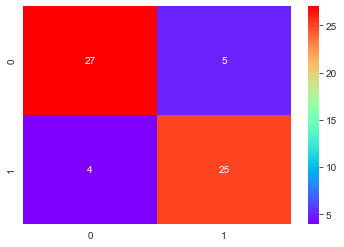

In [57]:
cm=confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot=True, cmap='rainbow')
plt.show()

In [58]:
cr=classification_report(y_test, y_pred_test)
print(cr)

              precision    recall  f1-score   support

           0       0.87      0.84      0.86        32
           1       0.83      0.86      0.85        29

    accuracy                           0.85        61
   macro avg       0.85      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



In [59]:
temp_df=pd.DataFrame(data=[['naive Bayes', train_accuracy, test_accuracy]], columns=['Model','training Accuracy %','Testing Accuracy %'])
result=result.append(temp_df, ignore_index=True)
result

,Model,training Accuracy %,Testing Accuracy %
0,Logistic Regresssion,0.867220,0.803279
1,Support Vector Machine,0.672199,0.590164
2,Decision Tree,1.000000,0.721311
3,Random Forest,1.000000,0.852459
4,K-Nearest Neighbors,0.763485,0.639344
5,naive Bayes,0.838174,0.852459


In [60]:
joblib.dump(RF_model,'model.pkl')

['model.pkl']

In [62]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
245,44,1,1,130,219,0,0,188,0,0.0,2,0,2
349,62,0,2,130,263,0,1,97,0,1.2,1,1,3
135,58,0,0,170,225,1,0,146,1,2.8,1,2,1
389,63,1,3,145,233,1,0,150,0,2.3,0,0,1
66,53,1,2,130,197,1,0,152,0,1.2,0,0,2
